In [1]:
import pandas as pd
import matplotlib as plt
import altair as alt
%matplotlib inline

In [2]:
wnba = pd.read_csv('wnba.csv')
wnba['Pts_per_hour'] = 60*wnba['PTS']/wnba['MIN'] 

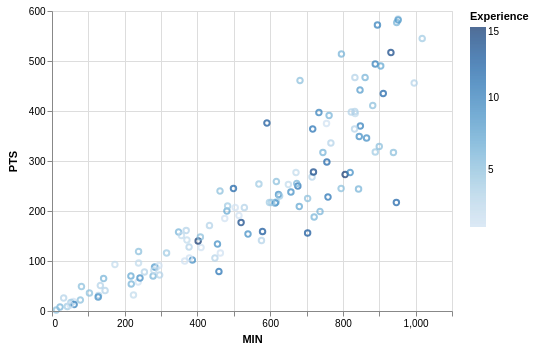

In [12]:
alt.Chart(wnba).mark_point().encode(
    x ='MIN:Q',
    y = 'PTS:Q',
    color = 'Experience:Q',
    tooltip = ['Name','PTS','MIN:Q','Experience']
)


In [28]:
grouped_freq_table = wnba['PTS'].value_counts(bins=10,normalize=True).sort_index(ascending=False)*100
grouped_freq_table.to_frame().reset_index()['index']

0    (525.8, 584.0]
1    (467.6, 525.8]
2    (409.4, 467.6]
3    (351.2, 409.4]
4    (293.0, 351.2]
5    (234.8, 293.0]
6    (176.6, 234.8]
7    (118.4, 176.6]
8     (60.2, 118.4]
9     (1.417, 60.2]
Name: index, dtype: object

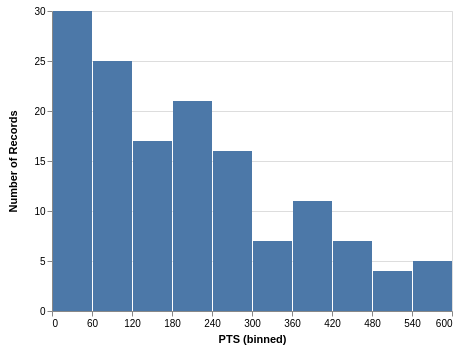

In [52]:
bar = alt.Chart(wnba).mark_bar().encode(
    alt.X('PTS:Q', bin=alt.Bin(step=60)),
    alt.Y('count():O')
)
bar

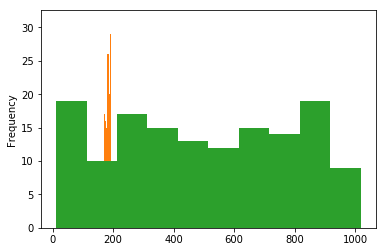

In [54]:
wnba['Age'].plot.hist()

wnba['Height'].plot.hist()

wnba['MIN'].plot.hist()


In [70]:
wnba['ageO'] = wnba['Age'].apply(lambda x: 'old' if x >= 27 else 'young')
wnba['minO'] = wnba['MIN'].apply(lambda x: 'longer' if x >= 497 else 'shorter')

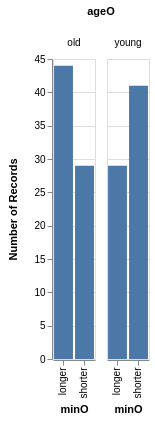

In [72]:
alt.Chart(wnba).mark_bar().encode(
    alt.X("minO:N"),
    y='count()',
    column = 'ageO:N',
    tooltip = 'count()'
)

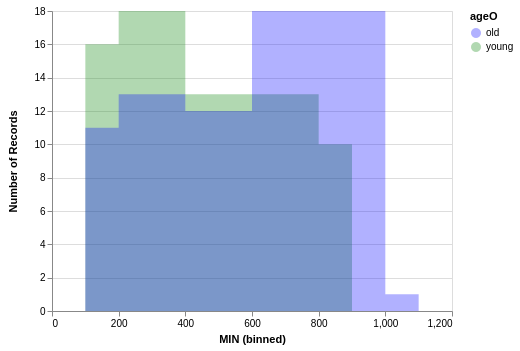

In [73]:
alt.Chart(wnba).mark_area(
    opacity=0.3,
    interpolate='step'
).encode(
    alt.X('MIN', bin=alt.Bin(maxbins=10)),
    alt.Y('count()', stack=None),
    alt.Color(
        'ageO:O',
        scale=alt.Scale(range=['#0000ff', '#008000', '#ff0000'])
    )
)